### 1 Importing libraries and data and renaming columns
### 2 preprocessinng
### 3 the elbow technique for n_clusters assignment
### 4 k-means clustering

### 1 import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '2 data', 'prepared data', 'task_6.4.csv'), index_col = [0])

In [5]:
df.shape

(3312, 22)

In [6]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat,unit_price,unit_profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,low profit,15.28,2.67400
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,high profit,43.13,18.11460
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,low profit,1.80,0.86400
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,profit loss,113.64,-26.98950
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,profit loss,70.71,-93.69075


### 2 preprocessing

####  removing categorical variables, subsetting 

In [7]:
#subsetting to include only numerical columns
dfk = df[['Order Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'unit_price', 'unit_profit']].copy()
dfk

,Order Date,Sales,Quantity,Discount,Profit,unit_price,unit_profit
0,2020-01-01,48.896,4,0.2,8.5568,15.28,2.674000
1,2020-01-01,474.430,11,0.0,199.2606,43.13,18.114600
2,2020-01-01,3.600,2,0.0,1.7280,1.80,0.864000
3,2020-01-01,454.560,5,0.2,-107.9580,113.64,-26.989500
4,2020-01-01,141.420,5,0.6,-187.3815,70.71,-93.690750
...,...,...,...,...,...,...,...
3307,2020-12-30,90.930,7,0.0,2.7279,12.99,0.389700
3308,2020-12-30,52.776,3,0.2,19.7910,21.99,8.246250
3309,2020-12-30,13.904,2,0.2,4.5188,8.69,2.824250
3310,2020-12-30,20.720,2,0.2,6.4750,12.95,4.046875


In [8]:
dfk.describe()

,Sales,Quantity,Discount,Profit,unit_price,unit_profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340,74.739224,1.536479
std,585.257531,2.221776,0.207429,241.864342,190.299694,114.385897
min,0.444000,1.000000,0.000000,-3839.990400,0.990000,-2929.484500
25%,17.018000,2.000000,0.000000,1.763200,6.480000,0.750356
50%,53.810000,3.000000,0.200000,8.296800,19.980000,2.892000
75%,205.105700,5.000000,0.200000,28.315125,70.980000,9.402075
max,13999.960000,14.000000,0.800000,6719.980800,3999.990000,1679.995200


In [9]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 3311
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order Date   3312 non-null   object 
 1   Sales        3312 non-null   float64
 2   Quantity     3312 non-null   int64  
 3   Discount     3312 non-null   float64
 4   Profit       3312 non-null   float64
 5   unit_price   3312 non-null   float64
 6   unit_profit  3312 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 207.0+ KB


#### order date column wrangling

In [10]:
#change order date dtype from string to datetime, then convert to an integer for analysis. 
dfk['Order Date'] = pd.to_datetime(dfk['Order Date'])

In [11]:
dfk['Order Date'] = dfk['Order Date'].astype('int64') // 10**9

In [12]:
dfk['Order Date']

0       1577836800
1       1577836800
2       1577836800
3       1577836800
4       1577836800
           ...    
3307    1609286400
3308    1609286400
3309    1609286400
3310    1609286400
3311    1609286400
Name: Order Date, Length: 3312, dtype: int64

####  scaling 

In [13]:
# Select the numerical variables that need scaling
numerical_variables = ['Order Date', 'Sales', 'Quantity', 'Profit', 'unit_price', 'unit_profit']

In [14]:
# Create a StandardScaler object
scaler = StandardScaler()

In [15]:
# Fit and transform the numerical variables with the scaler
dfk.loc[:, numerical_variables] = scaler.fit_transform(dfk.loc[:, numerical_variables])

In [16]:
dfk.describe()

,Order Date,Sales,Quantity,Discount,Profit,unit_price,unit_profit
count,3.312000e+03,3.312000e+03,3.312000e+03,3312.000000,3312.000000,3.312000e+03,3.312000e+03
mean,-5.595095e-15,-2.574430e-17,-4.934325e-17,0.156467,0.000000,6.167906e-17,-6.436076e-18
std,1.000151e+00,1.000151e+00,1.000151e+00,0.207429,1.000151,1.000151e+00,1.000151e+00
min,-1.817956e+00,-3.775616e-01,-1.245547e+00,0.000000,-15.995689,-3.876010e-01,-2.562784e+01
25%,-8.833843e-01,-3.492382e-01,-7.953884e-01,0.000000,-0.109372,-3.587475e-01,-6.873585e-03
50%,7.437717e-02,-2.863641e-01,-3.452301e-01,0.200000,-0.082354,-2.877960e-01,1.185221e-02
75%,8.906775e-01,-2.781370e-02,5.550865e-01,0.200000,0.000425,-1.975721e-02,6.877407e-02
max,1.558560e+00,2.354632e+01,4.606511e+00,0.800000,27.671623,2.062979e+01,1.467587e+01


### 3 determine clusters, the elbow technique

In [17]:
num_cl = range(1, 20) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(dfk).score(dfk) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

[-20014.46186847826,
 -15922.306301604896,
 -12730.581946872044,
 -10334.01514459703,
 -8255.296059883578,
 -6516.134608471801,
 -5941.418993676161,
 -5387.555311474382,
 -5000.987802035112,
 -4574.62667703607,
 -4212.030778363309,
 -3949.7032931656076,
 -3668.9518844676986,
 -3493.7627577889643,
 -3347.01636266798,
 -3194.333206187088,
 -3115.279572422293,
 -2952.6447040958856,
 -2883.0512746115987]

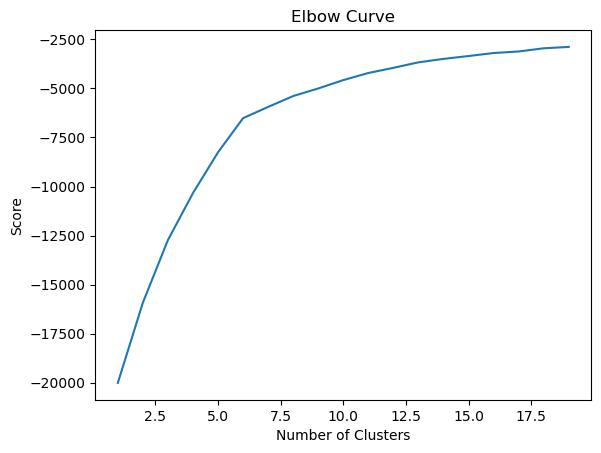

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### using 5 - 8 clusters seems appropriate, choosing 5 for this exercise

### 4 k-means algorithm

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [22]:
# Add cluster labels to the original DataFrame
dfk['clusters'] = kmeans.fit_predict(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
dfk.head()

,Order Date,Sales,Quantity,Discount,Profit,unit_price,unit_profit,clusters
0,-1.817956,-0.294762,0.104928,0.2,-0.081279,-0.312498,0.009946,4
1,-1.817956,0.432437,3.256036,0.0,0.707314,-0.166127,0.144953,4
2,-1.817956,-0.372168,-0.795388,0.0,-0.109517,-0.383344,-0.005880,4
3,-1.817956,0.398481,0.555087,0.2,-0.563088,0.204449,-0.249421,4
4,-1.817956,-0.136647,0.555087,0.6,-0.891518,-0.021176,-0.832634,4


In [24]:
dfk['clusters'].value_counts()

1    1737
4    1420
0     145
2       7
3       3
Name: clusters, dtype: int64

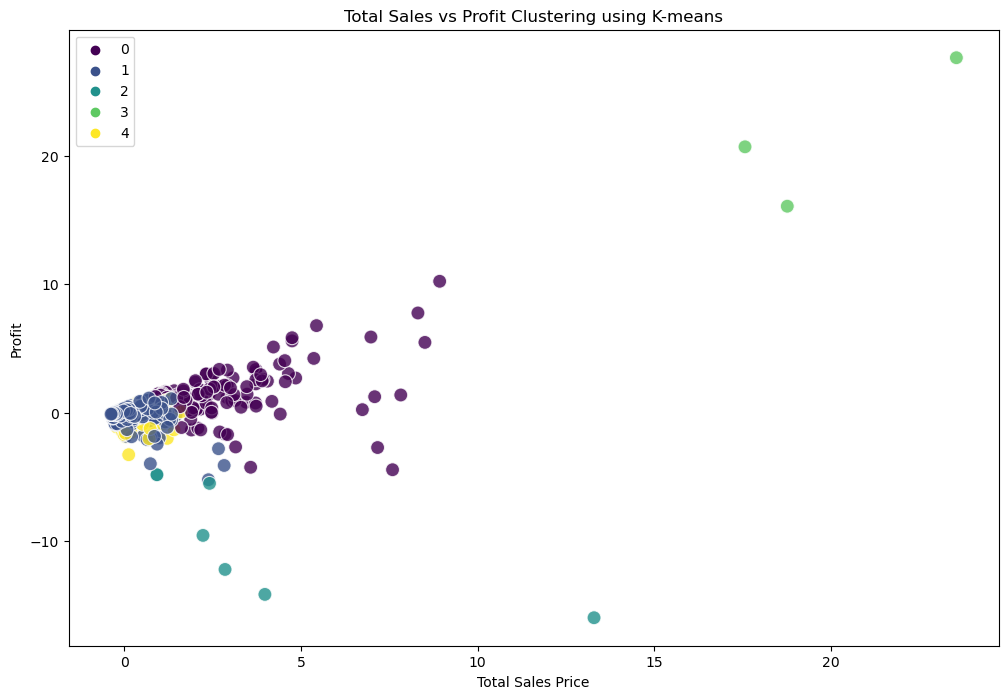

In [25]:
# Plot the clusters for the dependent 'profit' and independent 'sales' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Sales'], y=dfk['Profit'], hue='clusters', s=100, data=dfk, palette='viridis', alpha=0.8) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales Price') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.title('Total Sales vs Profit Clustering using K-means')
plt.legend()
plt.show()

### insight:
    * cluster 4, the 3rd largest, is distinct from others and needs to be identified
    * cluster 1 has unique negative profit values, largest cluster
    * cluster 3 is smallest cluster, likely represents printers 
    * cluster 2 and 0 are difficult to visualize in this plot

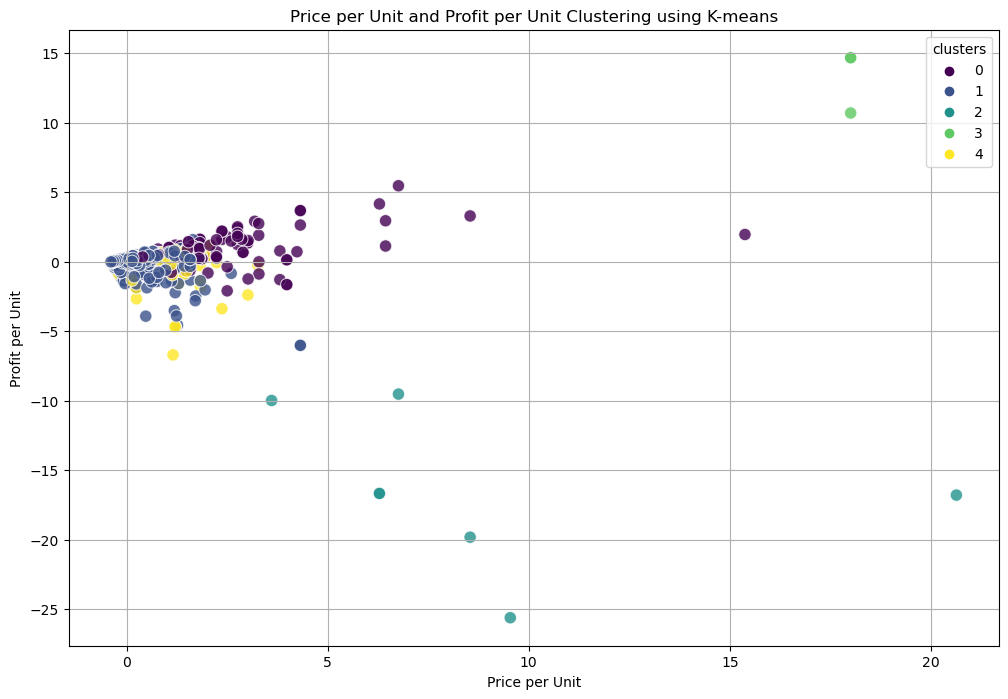

In [26]:
# plot clusters for unit_price and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['unit_price'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Price per Unit') 
plt.ylabel('Profit per Unit') 
plt.title('Price per Unit and Profit per Unit Clustering using K-means')
plt.show()

### insight:
    * this plot displays the normalized profit and sales values
    * similar patterns observed but centroids are even closer making visualizing more difficult

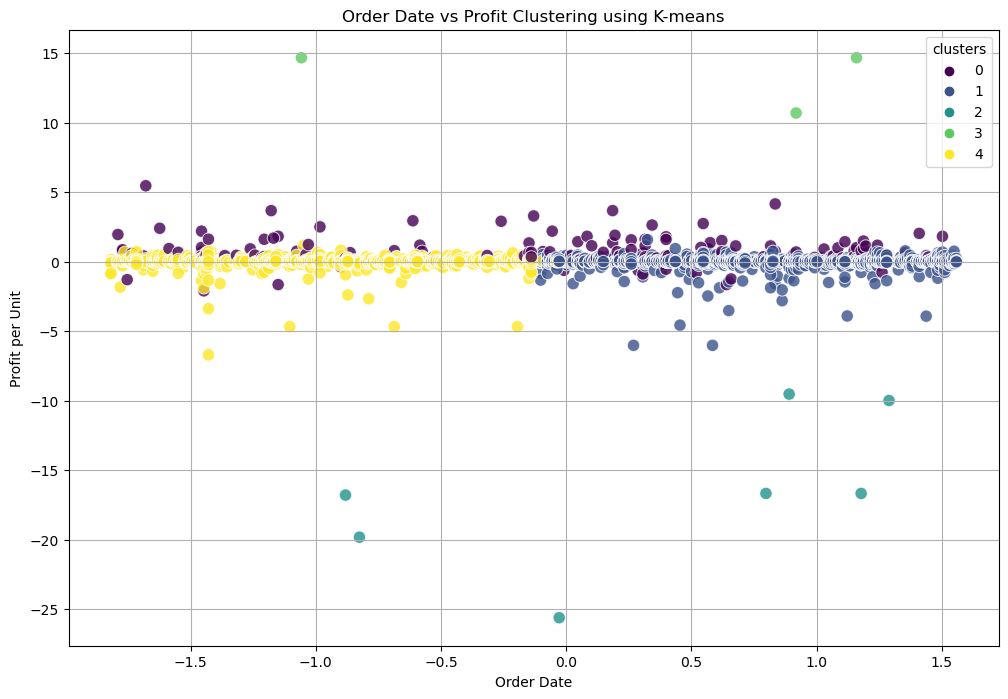

In [27]:
# plot clusters for order date and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Order Date'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Order Date') 
plt.ylabel('Profit per Unit') 
plt.title('Order Date vs Profit Clustering using K-means')
plt.show()

#### insight:
    * cluster 1 and 2 have a unique orientation regarding date and need to be explored as it suggests there is seasonality 
    * 

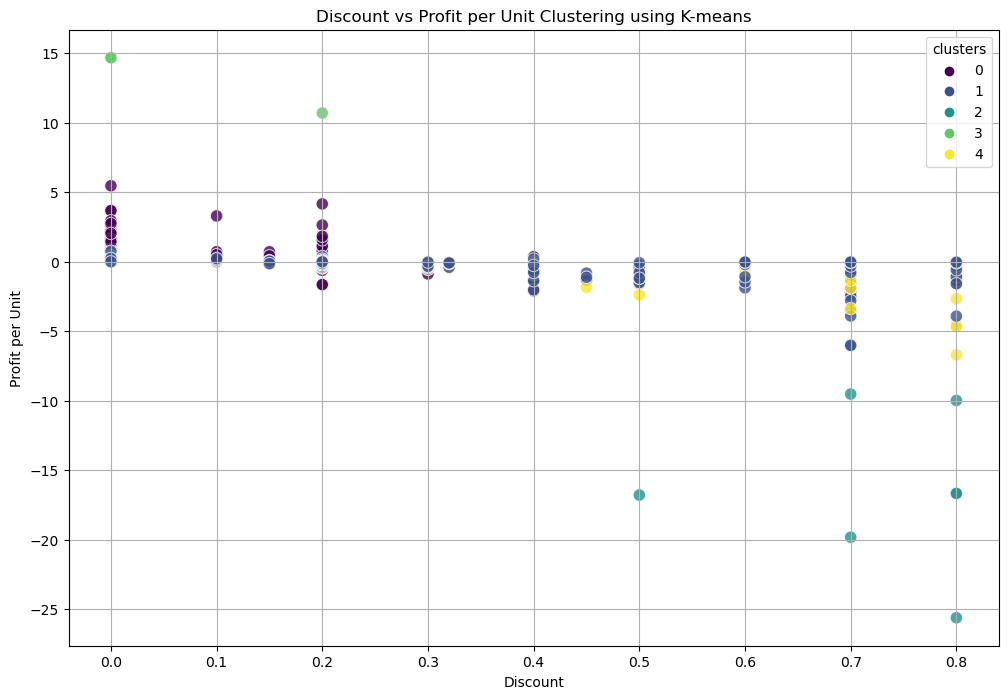

In [28]:
# plot clusters for discount and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Discount'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Discount') 
plt.ylabel('Profit per Unit') 
plt.title('Discount vs Profit per Unit Clustering using K-means')
plt.show()

#### insight:
    * cluster 4 again shows the most promising pattern to explore regarding profit
    * at 20% discount, a large grouping of products inside cluster 4 are profitable
    * at 50% discount the products inside cluster 4 loose profitability

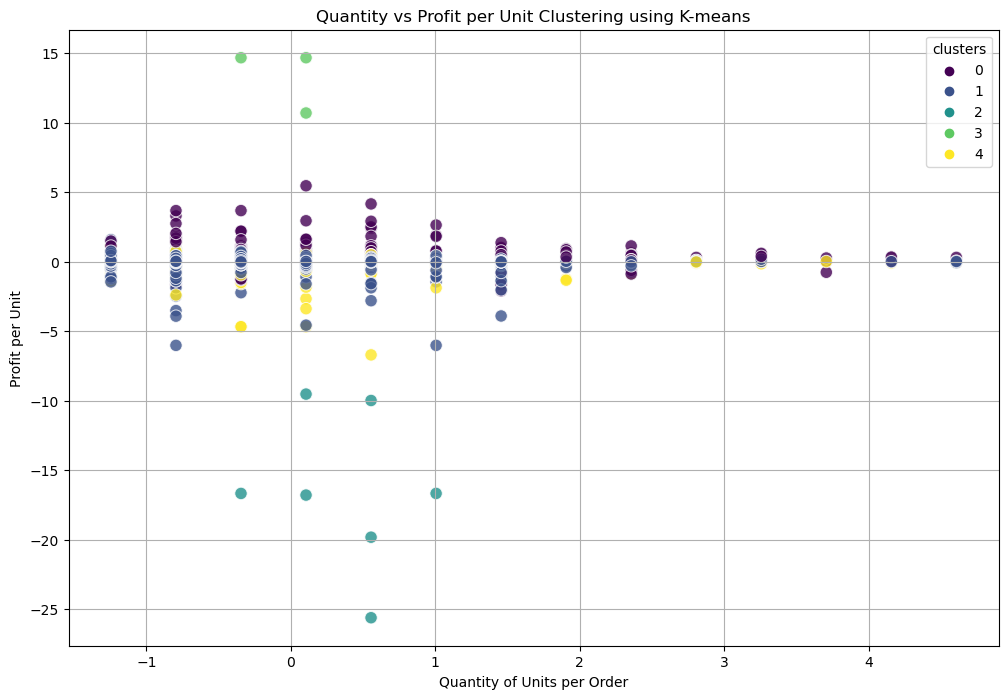

In [29]:
# plot clusters for quantity and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Quantity'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Quantity of Units per Order') 
plt.ylabel('Profit per Unit') 
plt.title('Quantity vs Profit per Unit Clustering using K-means')
plt.show()

#### insight:
        * cluster 0 is showing a unique pattern of larger quantity of units per order
        * cluster 4 shows a negative correlation with profit and quantity,
        * need to explore for a connection between quantity and discount 

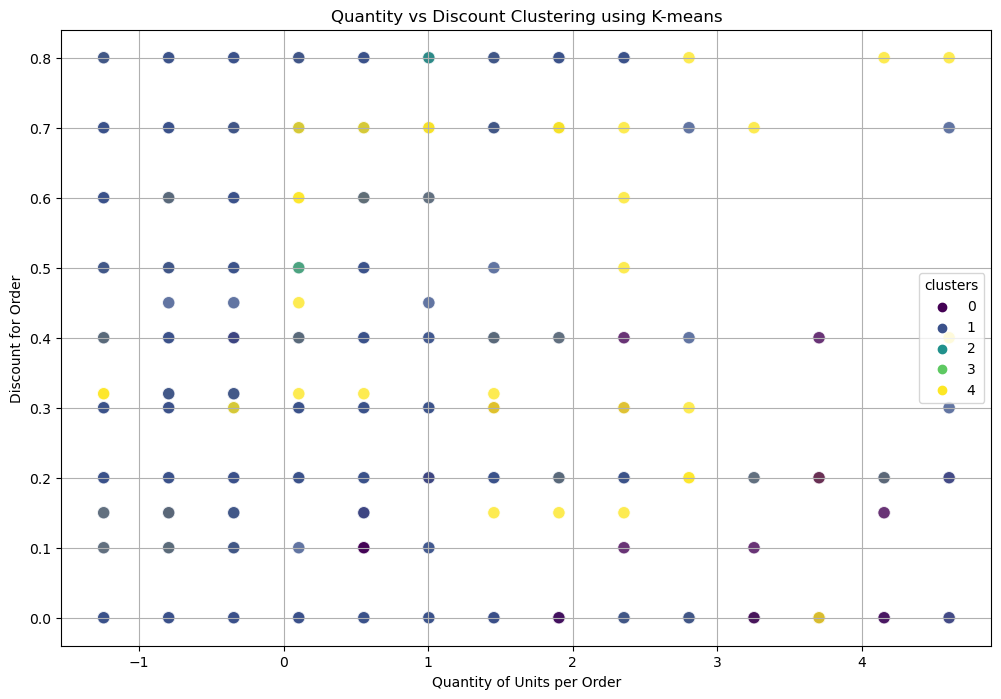

In [30]:
# plot clusters for quantity and discount variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Quantity'], y=dfk['Discount'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Quantity of Units per Order') 
plt.ylabel('Discount for Order') 
plt.title('Quantity vs Discount Clustering using K-means')
plt.show()

#### insight:
    * unclear association between discount and quantity regarding the k-means clusters (are stacked colors causing the mustardy looking dots?) 

In [31]:
#dfk.loc[dfk['clusters'] == 1, 'cluster'] = 'blue'
#dfk.loc[dfk['clusters'] == 2, 'cluster'] = 'aqua'
#dfk.loc[dfk['clusters'] == 3, 'cluster'] = 'green'
#dfk.loc[dfk['clusters'] == 4, 'cluster'] = 'yellow'


In [32]:
dfk.groupby('clusters').agg({'unit_price':['mean', 'median'], 
                         'unit_profit':['mean', 'median'], 
                         'Quantity':['mean', 'median'],
                         'Discount':['mean', 'median'],    
                         'Discount':['mean', 'median']})

unit_price            unit_profit             Quantity            \
               mean     median        mean     median      mean    median   
clusters                                                                    
0          1.937652   1.487777    0.781345   0.622672  0.902795  0.555087   
1         -0.120765  -0.294576   -0.013807   0.011260 -0.063266 -0.345230   
2          8.807549   6.760100  -16.450716 -16.683085  0.362162  0.555087   
3         18.001963  18.001963   13.349749  14.675867 -0.045125  0.104928   
4         -0.131585  -0.303510   -0.010004   0.009783 -0.016488 -0.345230   

          Discount         
              mean median  
clusters                   
0         0.096897    0.0  
1         0.154162    0.2  
2         0.728571    0.8  
3         0.066667    0.0  
4         0.162739    0.2

### Insight Summary:
    * cluster 4 is has the best pattern with profitable sales and needs to be investigated
    * cluster 1 seems to indicate a pattern of unprofitable sales and products which should be investigated

### exploring with 4 clusters, column = clusters_4

In [33]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [34]:
# Fit the k-means object to the data.

kmeans.fit(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [35]:
# Add cluster labels to the original DataFrame
dfk['clusters_4'] = kmeans.fit_predict(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
dfk.head()

,Order Date,Sales,Quantity,Discount,Profit,unit_price,unit_profit,clusters,clusters_4
0,-1.817956,-0.294762,0.104928,0.2,-0.081279,-0.312498,0.009946,4,1
1,-1.817956,0.432437,3.256036,0.0,0.707314,-0.166127,0.144953,4,1
2,-1.817956,-0.372168,-0.795388,0.0,-0.109517,-0.383344,-0.005880,4,1
3,-1.817956,0.398481,0.555087,0.2,-0.563088,0.204449,-0.249421,4,1
4,-1.817956,-0.136647,0.555087,0.6,-0.891518,-0.021176,-0.832634,4,1


In [37]:
dfk['clusters_4'].value_counts()

0    1882
1    1420
3       7
2       3
Name: clusters_4, dtype: int64

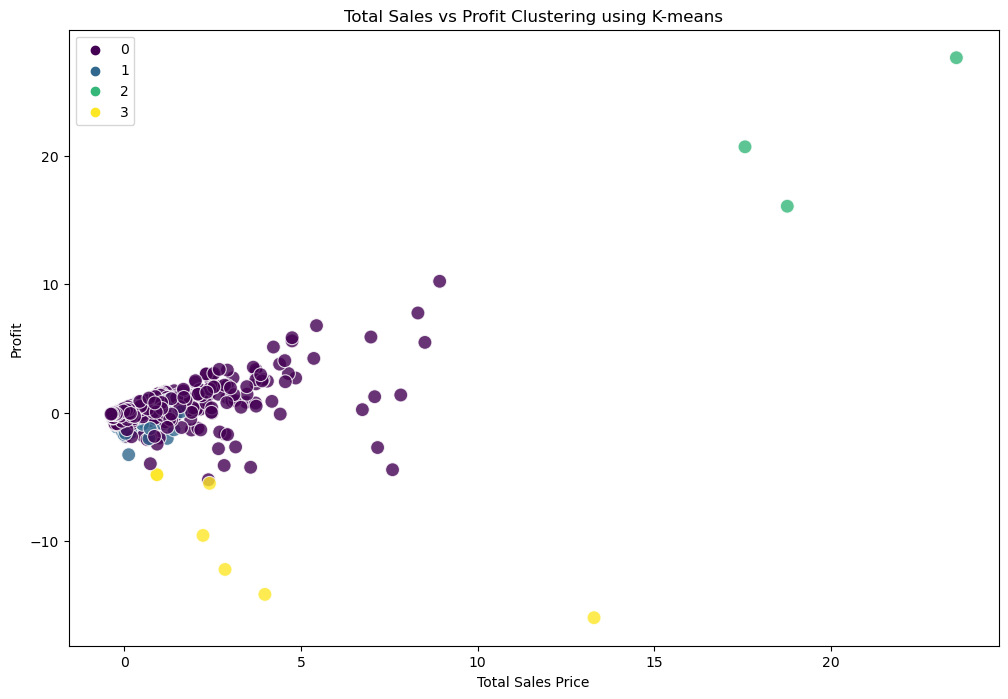

In [38]:
# Plot the clusters for the dependent 'profit' and independent 'sales' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Sales'], y=dfk['Profit'], hue='clusters_4', s=100, data=dfk, palette='viridis', alpha=0.8) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales Price') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.title('Total Sales vs Profit Clustering using K-means')
plt.legend()
plt.show()

### insight:
    * cluster 4, the 3rd largest, is distinct from others and needs to be identified
    * cluster 1 has unique negative profit values, largest cluster
    * cluster 3 is smallest cluster, likely represents printers 
    * cluster 2 and 0 are difficult to visualize in this plot

### exploring with  clusters, column = clusters_3

In [39]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [40]:
# Fit the k-means object to the data.

kmeans.fit(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [41]:
# Add cluster labels to the original DataFrame
dfk['clusters_3'] = kmeans.fit_predict(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
dfk.head()

,Order Date,Sales,Quantity,Discount,Profit,unit_price,unit_profit,clusters,clusters_4,clusters_3
0,-1.817956,-0.294762,0.104928,0.2,-0.081279,-0.312498,0.009946,4,1,1
1,-1.817956,0.432437,3.256036,0.0,0.707314,-0.166127,0.144953,4,1,1
2,-1.817956,-0.372168,-0.795388,0.0,-0.109517,-0.383344,-0.005880,4,1,1
3,-1.817956,0.398481,0.555087,0.2,-0.563088,0.204449,-0.249421,4,1,1
4,-1.817956,-0.136647,0.555087,0.6,-0.891518,-0.021176,-0.832634,4,1,1


In [43]:
dfk['clusters_3'].value_counts()

0    1887
1    1422
2       3
Name: clusters_3, dtype: int64

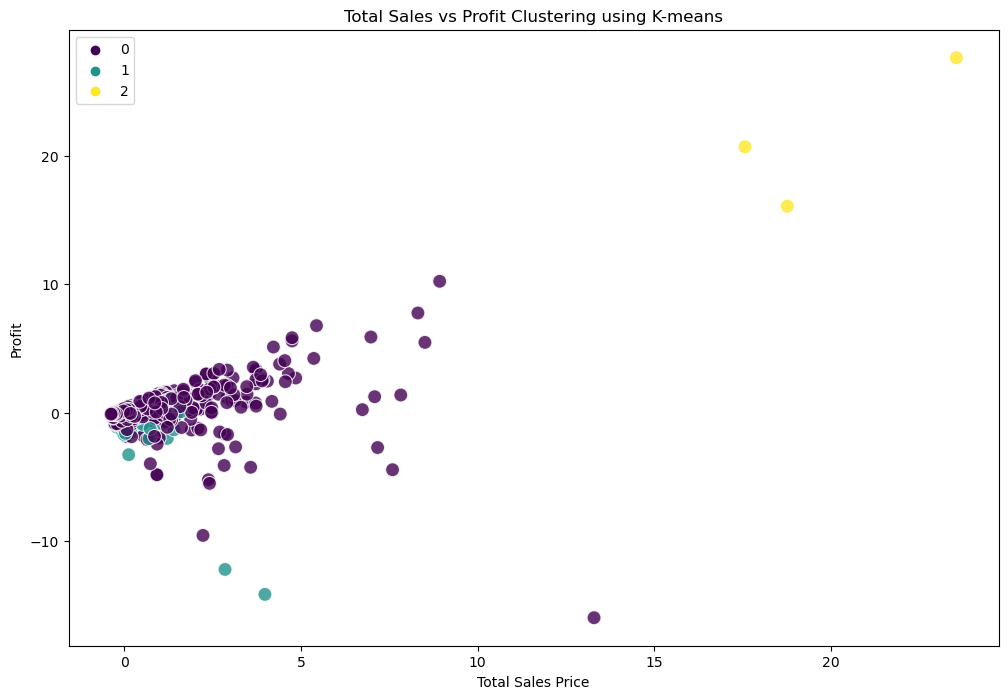

In [44]:
# Plot the clusters for the dependent 'profit' and independent 'sales' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Sales'], y=dfk['Profit'], hue='clusters_3', s=100, data=dfk, palette='viridis', alpha=0.8) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales Price') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.title('Total Sales vs Profit Clustering using K-means')
plt.legend()
plt.show()

### insight:
    * cluster 4, the 3rd largest, is distinct from others and needs to be identified
    * cluster 1 has unique negative profit values, largest cluster
    * cluster 3 is smallest cluster, likely represents printers 
    * cluster 2 and 0 are difficult to visualize in this plot